# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from loguru import logger

In [2]:
# Algumas configurações para o matplotlib.
from IPython.core.pylabtools import figsize
# %matplotlib inline


figsize(12, 8)

sns.set()

In [3]:
fifa = pd.read_csv("fifa.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
                   ]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.

* This dataset was imported from Kaggle and corresponds to Fifa19 players
* For the purpose of the AceleraDev Codenation DataScience Week 6 Challenge some columns were dropped
* Such process result in a dataset named `fifa` with 18,207 rows and 37 columns
* All of the kept columns contain numerical data
 * there are 3 columns `["Age", "Overall", "Potential"]` that contain 18,207 `int64` entries each and
 * each of the 34 left ones contain 18,159 non-null `float64` and 48 nan


In [6]:
fifa.shape

(18207, 37)

In [7]:
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 37 columns):
Age                18207 non-null int64
Overall            18207 non-null int64
Potential          18207 non-null int64
Crossing           18159 non-null float64
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength       

In [9]:
fifa.isna().sum()

Age                 0
Overall             0
Potential           0
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [10]:
fifa.columns

Index(['Age', 'Overall', 'Potential', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [11]:
#Criando um dataframe auxliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'column' : fifa.columns,
                    'dtype': fifa.dtypes,
                    'missing' : fifa.isna().sum(),
                    'length' : fifa.shape[0],
                    'nunique': fifa.nunique()})
cons['missing_pct'] = round(cons['missing'] / cons['length'],2)
cons

,column,dtype,missing,length,nunique,missing_pct
Age,Age,int64,0,18207,29,0.0
Overall,Overall,int64,0,18207,48,0.0
Potential,Potential,int64,0,18207,47,0.0
Crossing,Crossing,float64,48,18207,89,0.0
Finishing,Finishing,float64,48,18207,93,0.0
HeadingAccuracy,HeadingAccuracy,float64,48,18207,91,0.0
ShortPassing,ShortPassing,float64,48,18207,85,0.0
Volleys,Volleys,float64,48,18207,87,0.0
Dribbling,Dribbling,float64,48,18207,94,0.0
Curve,Curve,float64,48,18207,89,0.0


In [12]:
fifa.describe()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


* Due to the high amount of available data, the rows with `nan` data will be dropped
* Notice that there are the same rows for all columns with `float64`
* Now all columns contain numerical data


In [13]:
fifa.dropna(inplace=True)
fifa.describe()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,71.319126,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.670568,6.914613,6.134420,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


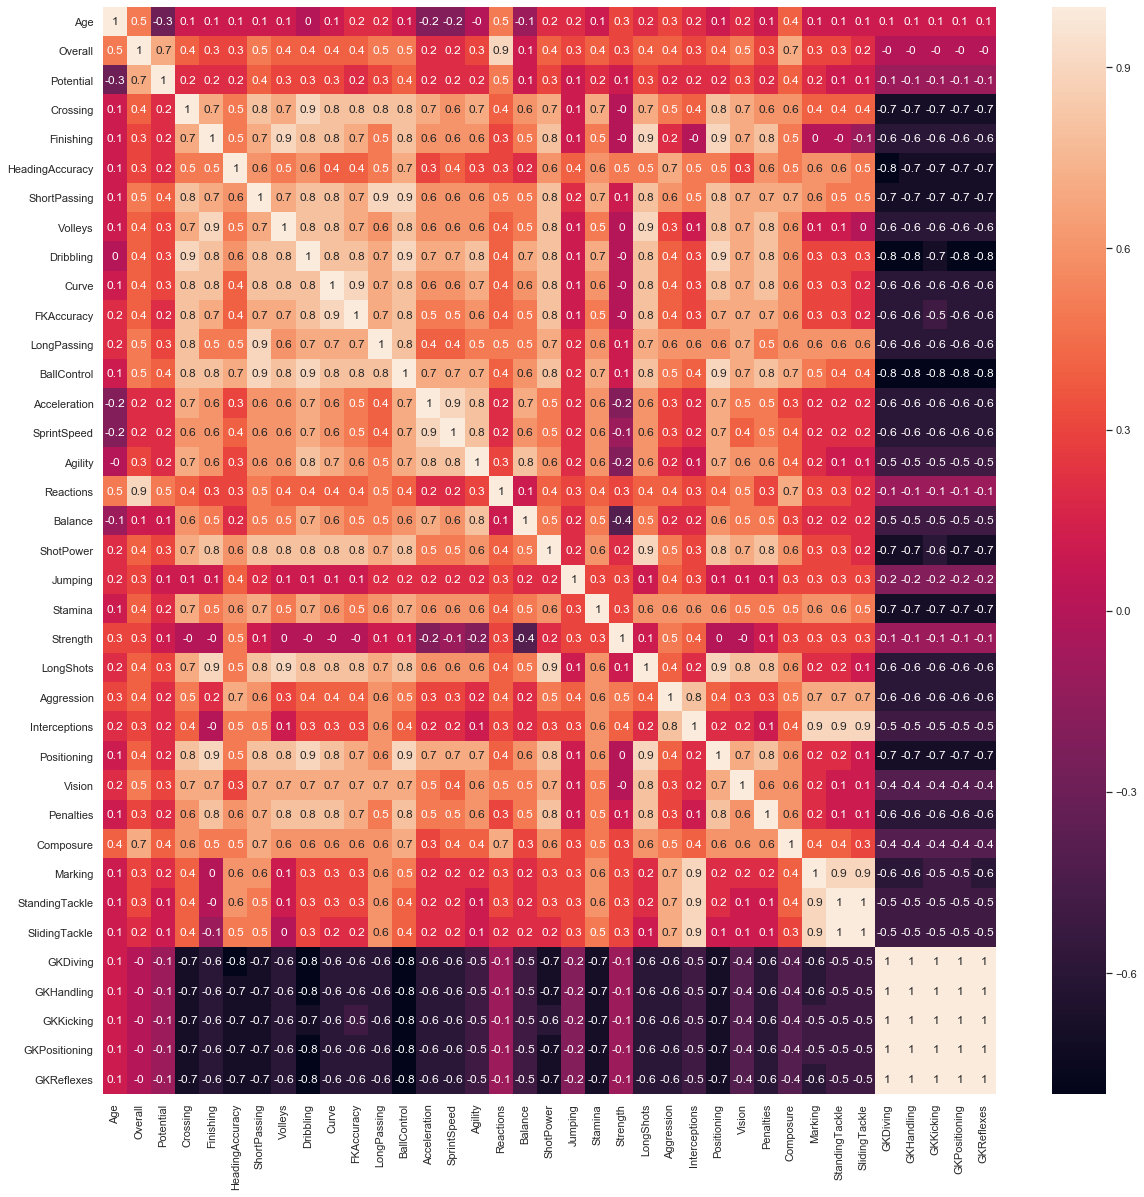

In [14]:
plt.figure(figsize = (20,20))
sns.heatmap(fifa.corr().round(1), annot= True);

## PCA

Original shape: (18159, 37), projected shape: (18159, 2)


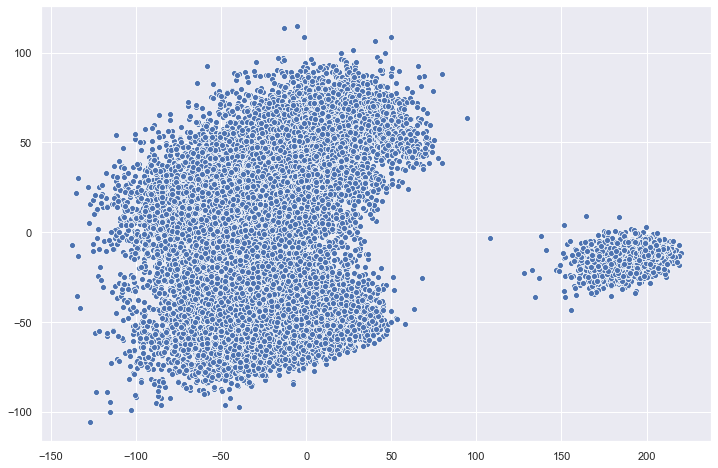

In [15]:
pca = PCA(n_components=2)

projected = pca.fit_transform(fifa)

print(f"Original shape: {fifa.shape}, projected shape: {projected.shape}")
sns.scatterplot(projected[:, 0], projected[:, 1]);

In [16]:
pca = PCA().fit(fifa)
evr = pca.explained_variance_ratio_
evr

array([5.65280555e-01, 1.81025219e-01, 5.95283391e-02, 4.34269284e-02,
       2.63532326e-02, 1.20707695e-02, 1.03550495e-02, 8.52951131e-03,
       7.87862979e-03, 7.20416677e-03, 7.18180297e-03, 6.32893542e-03,
       5.19242286e-03, 4.90798293e-03, 4.74209042e-03, 4.62772008e-03,
       4.25173246e-03, 3.86288432e-03, 3.76588448e-03, 3.75092615e-03,
       3.47815213e-03, 3.26730709e-03, 3.03137944e-03, 2.97415845e-03,
       2.56797543e-03, 2.30353342e-03, 2.14815132e-03, 1.56135904e-03,
       1.55351696e-03, 1.08664227e-03, 1.06824189e-03, 1.05891525e-03,
       9.58143746e-04, 8.89209394e-04, 8.59732430e-04, 7.34611045e-04,
       1.94187517e-04])

In [17]:
cumulative_variance_ratio = np.cumsum(evr)
cumulative_variance_ratio

array([0.56528056, 0.74630577, 0.80583411, 0.84926104, 0.87561427,
       0.88768504, 0.89804009, 0.9065696 , 0.91444823, 0.9216524 ,
       0.9288342 , 0.93516314, 0.94035556, 0.94526355, 0.95000564,
       0.95463336, 0.95888509, 0.96274797, 0.96651386, 0.97026478,
       0.97374294, 0.97701024, 0.98004162, 0.98301578, 0.98558376,
       0.98788729, 0.99003544, 0.9915968 , 0.99315032, 0.99423696,
       0.9953052 , 0.99636412, 0.99732226, 0.99821147, 0.9990712 ,
       0.99980581, 1.        ])

In [18]:
nr_PC_95pct = np.argmax(cumulative_variance_ratio >= 0.95) + 1
nr_PC_95pct

15

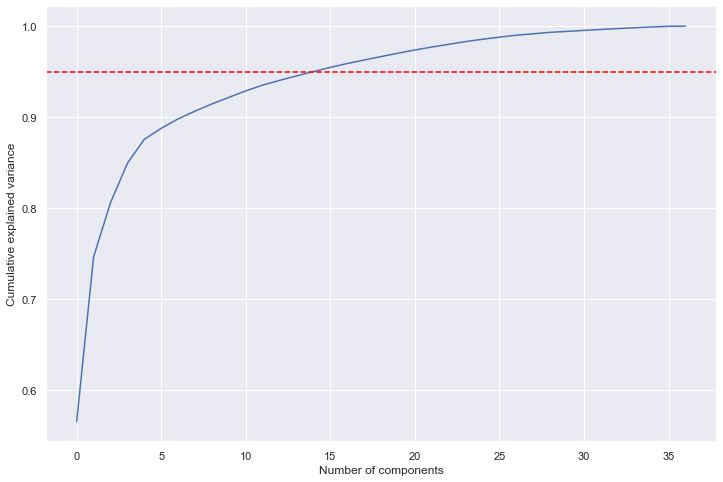

In [19]:
g = sns.lineplot(np.arange(len(evr)), cumulative_variance_ratio)
g.axes.axhline(0.95, ls="--", color="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

### Attempt to rank the variables with PCA results

In [20]:
fifa_pca = pca.transform(fifa)

# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = fifa.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df


,0,1
0,PC1,Dribbling
1,PC2,StandingTackle
2,PC3,GKReflexes
3,PC4,HeadingAccuracy
4,PC5,Jumping
5,PC6,Jumping
6,PC7,Strength
7,PC8,Aggression
8,PC9,LongShots
9,PC10,Aggression


In [43]:
def create_importance_dataframe(pca, original_num_df):
    '''
    arguments: 
    original_num_df: the original numeric dataframe
    pca: the PCA model fitted object
    
    return: 
    importance_df: dataframe with PCA values assigned to the variables
    '''
    # Change pcs components ndarray to a dataframe
    importance_df = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns = original_num_df.columns

    # Change to absolute values
    importance_df = importance_df.apply(np.abs).T

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df = create_importance_dataframe(pca, fifa)

# Show first few rows
print(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 features are \n')
print(pc1_top_10_features)

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 features are \n')
print(pc2_top_10_features)

                PC1       PC2       PC3       PC4       PC5       PC6  \
Age        0.006164  0.008872  0.098421  0.051962  0.025538  0.076085   
Overall    0.037062  0.000158  0.204340  0.033424  0.142350  0.104744   
Potential  0.022740  0.007781  0.095082  0.013968  0.080294  0.158366   
Crossing   0.213639  0.044308  0.102225  0.226181  0.084540  0.109416   
Finishing  0.198891  0.257630  0.011100  0.174197  0.026454  0.051291   

                PC7       PC8       PC9      PC10  ...      PC28      PC29  \
Age        0.026483  0.030289  0.068622  0.065287  ...  0.039690  0.072030   
Overall    0.067294  0.158877  0.000679  0.049104  ...  0.012132  0.023754   
Potential  0.134413  0.207905  0.073653  0.135241  ...  0.031725  0.062838   
Crossing   0.247712  0.113686  0.345175  0.296305  ...  0.010759  0.029647   
Finishing  0.066219  0.091063  0.279443  0.150343  ...  0.035010  0.005510   

               PC30      PC31      PC32      PC33      PC34      PC35  \
Age        0.021525

In [23]:
importance_df.mean(axis=1).sort_values(ascending = False)

LongPassing        0.128852
Crossing           0.127211
Vision             0.125510
ShotPower          0.124655
Composure          0.123142
FKAccuracy         0.122182
Potential          0.119678
Curve              0.117813
Dribbling          0.116221
SlidingTackle      0.115525
Balance            0.115422
Positioning        0.115354
Agility            0.113166
BallControl        0.113093
LongShots          0.113015
Interceptions      0.111742
Strength           0.110496
ShortPassing       0.110318
Penalties          0.109567
Reactions          0.109566
HeadingAccuracy    0.108065
StandingTackle     0.107487
SprintSpeed        0.107274
Finishing          0.105385
Age                0.102282
Volleys            0.101317
Aggression         0.098964
Stamina            0.096898
Acceleration       0.094991
Marking            0.094792
Jumping            0.092810
GKReflexes         0.091244
GKPositioning      0.091019
GKDiving           0.089573
Overall            0.088793
GKKicking          0

In [24]:
importance_PC = importance_df.mean()
importance_PC.sort_values(ascending = False)

PC1     0.152231
PC9     0.138795
PC3     0.134303
PC7     0.130099
PC11    0.127376
PC4     0.126538
PC18    0.126525
PC5     0.124738
PC19    0.123931
PC8     0.123457
PC16    0.122812
PC20    0.122422
PC26    0.121407
PC2     0.121282
PC6     0.120768
PC14    0.120662
PC23    0.120270
PC22    0.119768
PC12    0.117343
PC13    0.116520
PC15    0.112547
PC27    0.112319
PC10    0.111812
PC21    0.111196
PC17    0.109687
PC24    0.100096
PC25    0.099816
PC31    0.092789
PC32    0.088416
PC29    0.083358
PC36    0.081750
PC30    0.077475
PC33    0.068289
PC28    0.059121
PC37    0.057297
PC34    0.054363
PC35    0.049261
dtype: float64

In [25]:
importance_df.rank(axis=0,ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37
Age,37.0,33.0,22.0,28.0,32.0,25.0,33.0,29.0,30.0,19.0,...,11.0,8.0,19.0,14.0,16.0,5.0,11.0,30.0,2.0,2.0
Overall,34.0,37.0,9.0,34.0,13.0,20.0,23.0,12.0,37.0,22.0,...,23.0,21.0,14.0,11.0,14.0,8.0,10.0,13.0,1.0,1.0
Potential,36.0,34.0,24.0,36.0,22.0,11.0,16.0,6.0,28.0,11.0,...,14.0,9.0,9.0,23.0,23.0,6.0,8.0,33.0,4.0,3.0
Crossing,4.0,31.0,21.0,7.0,21.0,17.0,7.0,18.0,2.0,4.0,...,24.0,18.0,37.0,28.0,22.0,21.0,14.0,24.0,12.0,31.0
Finishing,9.0,5.0,35.0,10.0,31.0,27.0,24.0,20.0,3.0,9.0,...,13.0,33.0,22.0,18.0,17.0,25.0,23.0,18.0,17.0,24.0
HeadingAccuracy,18.0,14.0,23.0,1.0,8.0,29.0,15.0,3.0,32.0,26.0,...,12.0,19.0,15.0,36.0,32.0,15.0,15.0,36.0,9.0,14.0
ShortPassing,16.0,32.0,18.0,35.0,27.0,7.0,10.0,35.0,17.0,16.0,...,3.0,1.0,4.0,3.0,4.0,30.0,9.0,9.0,19.0,10.0
Volleys,14.0,7.0,27.0,12.0,33.0,16.0,34.0,23.0,10.0,27.0,...,22.0,31.0,21.0,29.0,33.0,29.0,31.0,21.0,37.0,35.0
Dribbling,1.0,15.0,37.0,16.0,36.0,4.0,19.0,31.0,29.0,23.0,...,7.0,3.0,5.0,7.0,8.0,13.0,32.0,35.0,10.0,22.0
Curve,7.0,11.0,12.0,19.0,11.0,5.0,5.0,7.0,6.0,35.0,...,31.0,22.0,29.0,37.0,30.0,26.0,22.0,23.0,36.0,32.0


In [26]:
importance_df.iloc[:,:nr_PC_95pct].rank(axis=0,ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Age,37.0,33.0,22.0,28.0,32.0,25.0,33.0,29.0,30.0,19.0,20.0,21.0,23.0,26.0,23.0
Overall,34.0,37.0,9.0,34.0,13.0,20.0,23.0,12.0,37.0,22.0,32.0,17.0,25.0,18.0,28.0
Potential,36.0,34.0,24.0,36.0,22.0,11.0,16.0,6.0,28.0,11.0,35.0,34.0,35.0,15.0,13.0
Crossing,4.0,31.0,21.0,7.0,21.0,17.0,7.0,18.0,2.0,4.0,6.0,4.0,14.0,6.0,2.0
Finishing,9.0,5.0,35.0,10.0,31.0,27.0,24.0,20.0,3.0,9.0,22.0,20.0,17.0,13.0,37.0
HeadingAccuracy,18.0,14.0,23.0,1.0,8.0,29.0,15.0,3.0,32.0,26.0,18.0,33.0,20.0,7.0,32.0
ShortPassing,16.0,32.0,18.0,35.0,27.0,7.0,10.0,35.0,17.0,16.0,10.0,37.0,24.0,16.0,12.0
Volleys,14.0,7.0,27.0,12.0,33.0,16.0,34.0,23.0,10.0,27.0,11.0,30.0,21.0,25.0,6.0
Dribbling,1.0,15.0,37.0,16.0,36.0,4.0,19.0,31.0,29.0,23.0,17.0,12.0,36.0,37.0,36.0
Curve,7.0,11.0,12.0,19.0,11.0,5.0,5.0,7.0,6.0,35.0,27.0,31.0,7.0,19.0,3.0


* For the n PCs that are necessary to explain 95% variance, this could give a idea of important role of the variable.
* The small values present most importance on the n selected PCs.

* Such approach has a lot of failures:
1. not consider the importance of each PC
2. not consider the importance with values of each variable


In [27]:
importance_df.iloc[:,:nr_PC_95pct].rank(axis=0,ascending=False).mean(axis=1).sort_values()

Crossing           10.933333
FKAccuracy         12.000000
Curve              13.666667
Aggression         13.800000
ShotPower          14.000000
LongPassing        14.133333
SprintSpeed        14.400000
Vision             14.866667
Balance            15.466667
Penalties          15.866667
Jumping            16.200000
LongShots          16.466667
Strength           16.666667
Marking            16.866667
Acceleration       17.000000
Stamina            17.266667
Composure          17.600000
Positioning        17.800000
HeadingAccuracy    18.600000
Agility            18.733333
Finishing          18.800000
Volleys            19.733333
SlidingTackle      19.800000
StandingTackle     20.400000
ShortPassing       20.800000
Interceptions      20.800000
Reactions          21.733333
GKReflexes         23.133333
Dribbling          23.266667
Potential          23.733333
GKDiving           24.000000
Overall            24.066667
GKPositioning      25.466667
BallControl        25.666667
GKHandling    

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [28]:
def q1():
    pca = PCA().fit(fifa)
    evr = pca.explained_variance_ratio_
    
    return evr[0].round(3)

In [29]:
#Test
q1()

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [30]:
def q2():
    pca = PCA().fit(fifa)
    evr = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(evr)
    nr_PC_95pct = np.argmax(cumulative_variance_ratio >= 0.95) + 1   # Python starts at 0
    
    return nr_PC_95pct

In [31]:
#Test
q2()

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [32]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
     ]

In [33]:
x_projected = np.matmul(pca.components_, x)

In [34]:
def q3():
    pca = PCA().fit(fifa)
    x_projected = np.matmul(pca.components_, x)
    return (x_projected[0].round(3), x_projected[1].round(3))

In [35]:
# Test
q3()

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [36]:
y_train = fifa['Overall']
X_train = fifa.drop(columns=['Overall'])

In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)
rfe = RFE(reg)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [38]:
rfe_df = pd.DataFrame({'coluna':X_train.columns,
              'bool': rfe.get_support(),
              'coeficientes': pd.Series(reg.coef_)})
rfe_df

,coluna,bool,coeficientes
0,Age,True,0.508213
1,Potential,True,0.525115
2,Crossing,False,0.014064
3,Finishing,False,0.016305
4,HeadingAccuracy,True,0.046340
5,ShortPassing,True,0.041634
6,Volleys,False,0.001140
7,Dribbling,False,0.009972
8,Curve,False,0.004262
9,FKAccuracy,False,0.004326


In [39]:
rfe_df['coeficientes_abs'] = abs(rfe_df['coeficientes'])
rfe_df.nlargest(5, 'coeficientes_abs')['coluna'].tolist()

['Potential', 'Age', 'Reactions', 'BallControl', 'GKReflexes']

In [40]:
rfe_df.nlargest(5, 'coeficientes_abs')['coluna'].tolist()

['Potential', 'Age', 'Reactions', 'BallControl', 'GKReflexes']

In [41]:
def q4():
    
    y_train = fifa['Overall']
    X_train = fifa.drop(columns=['Overall'])
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    rfe = RFE(reg)
    rfe.fit(X_train,y_train)
    
    rfe_df = pd.DataFrame({'coluna':X_train.columns,
              'bool': rfe.get_support(),
              'coeficientes': pd.Series(reg.coef_)})
    rfe_df['coeficientes_abs'] = abs(rfe_df['coeficientes'])
    
    list_5 = rfe_df.nlargest(5, 'coeficientes_abs')['coluna'].tolist()
    
    return list_5

In [42]:
# Test
q4()

['Potential', 'Age', 'Reactions', 'BallControl', 'GKReflexes']